# Projeto 2 - Ciência dos Dados
## Predição do preço de imóveis brasileiros

Nome: Ananda Julia Galvão Campelo

Nome: Carol Magario de Mattos Barretto

Nome: Rafael Dourado Bastos de Oliveira

___
Carregando as bibliotecas necessárias:

In [231]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import os
from scipy import stats, special

# Bibliotecas gráficas para facilitar a vizualização dos dados
import matplotlib.pyplot as plt
import seaborn as sn
from IPython.display import display

# Biblioteca que remove os warnings do Jupter Notbook para uma vizualização mais limpa do documento
import warnings
warnings.filterwarnings('ignore')

In [232]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
c:\Users\Rafael Dourado\Desktop\Programação\Insper\cdados\22-2c-cd-p2-grupo_dj_lovers\notebooks


Carregando a base com todos dados:

In [233]:
path = '../data/'
filename = 'houses_to_rent.csv'

data = pd.read_csv(path+filename, sep=",")

* *city*: Cidade onde o imóvel está localizada
* *area*: Area do imovel [m²]
* *rooms*: Número de quartos 
* *bathroom*: Número de banheiros
* *parking spaces*: Número de vagas no estacionamento
* *floor*: Andar em que está localizado
* *animal*: Aceita animais? [acept/not acept]
* *furniture*: Está Mobilhada? [furnished/not furnished]
* *hoa*: Valor do Condominio [R$]
* *rent amount*: Valor do Aluguel [R$]
* *property tax*: IPTU [R$]
* *fire insurance*: Seguro Incendio [R$]
* *total*: Valor Total do Imóvel [R$]


In [234]:
data.head(10)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent_amount,property_tax,fire_insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


____
### Preparando a base de dados

#### Primeira Simplificação

Um estudo rápido dos dados revelou a variavel  `total` é composta da soma das variáveis `hoa`, `rent_amount`, `property_tax` e `fire_insurance`. Por isso, uma simplificação inicial do modelo que tentará descobrir o valor de uma apartamento será utilizar como **variavel Target** o `rent_amount` (valor do aluguel) e descartar as demais variaveis supracitadas durante a analise.

In [235]:
del data['hoa'], data['property_tax'], data['fire_insurance'], data['total']
data.head(10)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,rent_amount
0,São Paulo,70,2,1,1,7,acept,furnished,3300
1,São Paulo,320,4,4,0,20,acept,not furnished,4960
2,Porto Alegre,80,1,1,1,6,acept,not furnished,2800
3,Porto Alegre,51,2,1,0,2,acept,not furnished,1112
4,São Paulo,25,1,1,0,1,not acept,not furnished,800
5,São Paulo,376,3,3,7,-,acept,not furnished,8000
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,1900
7,São Paulo,213,4,4,4,4,acept,not furnished,3223
8,São Paulo,152,2,2,1,3,acept,furnished,15000
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,2300


#### Padronizando os dados

As variaveis `animal` e `furniture` são variaveis qualitativas que possuem apenas dois valores: `possui/aceita` e não `possui/não aceita`. Logo, para padronizar essas variaveis, substituiremos esses valores por `True` e `False`, respectivamente.


In [236]:
data.loc[(data['animal'] == 'acept'), 'animal'] = True
data.loc[(data['animal'] == 'not acept'), 'animal'] = False
data['animal'] = data['animal'].astype('boolean')

data.loc[(data['furniture'] == 'furnished'), 'furniture'] = True
data.loc[(data['furniture'] == 'not furnished'), 'furniture'] = False
data['furniture'] = data['furniture'].astype('boolean')

data.loc[(data['floor'] == '-'), 'floor'] = 0
data['floor'] = data['floor'].astype('int64')

data.head(10)

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,rent_amount
0,São Paulo,70,2,1,1,7,True,True,3300
1,São Paulo,320,4,4,0,20,True,False,4960
2,Porto Alegre,80,1,1,1,6,True,False,2800
3,Porto Alegre,51,2,1,0,2,True,False,1112
4,São Paulo,25,1,1,0,1,False,False,800
5,São Paulo,376,3,3,7,0,True,False,8000
6,Rio de Janeiro,72,2,1,0,7,True,False,1900
7,São Paulo,213,4,4,4,4,True,False,3223
8,São Paulo,152,2,2,1,3,True,True,15000
9,Rio de Janeiro,35,1,1,0,2,True,True,2300


### Análise Exploratória

In [237]:
describe = data.describe()
display(describe.round())

,area,rooms,bathroom,parking_spaces,floor,animal,furniture,rent_amount
count,10692.0,10692.0,10692.0,10692.0,10692.0,10692,10692,10692.0
unique,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,True,False,NaN
freq,NaN,NaN,NaN,NaN,NaN,8316,8086,NaN
mean,149.0,3.0,2.0,2.0,5.0,NaN,NaN,3896.0
std,537.0,1.0,1.0,2.0,5.0,NaN,NaN,3409.0
min,11.0,1.0,1.0,0.0,0.0,NaN,NaN,450.0
25%,56.0,2.0,1.0,0.0,1.0,NaN,NaN,1530.0
50%,90.0,2.0,2.0,1.0,3.0,NaN,NaN,2661.0
75%,182.0,3.0,3.0,2.0,8.0,NaN,NaN,5000.0


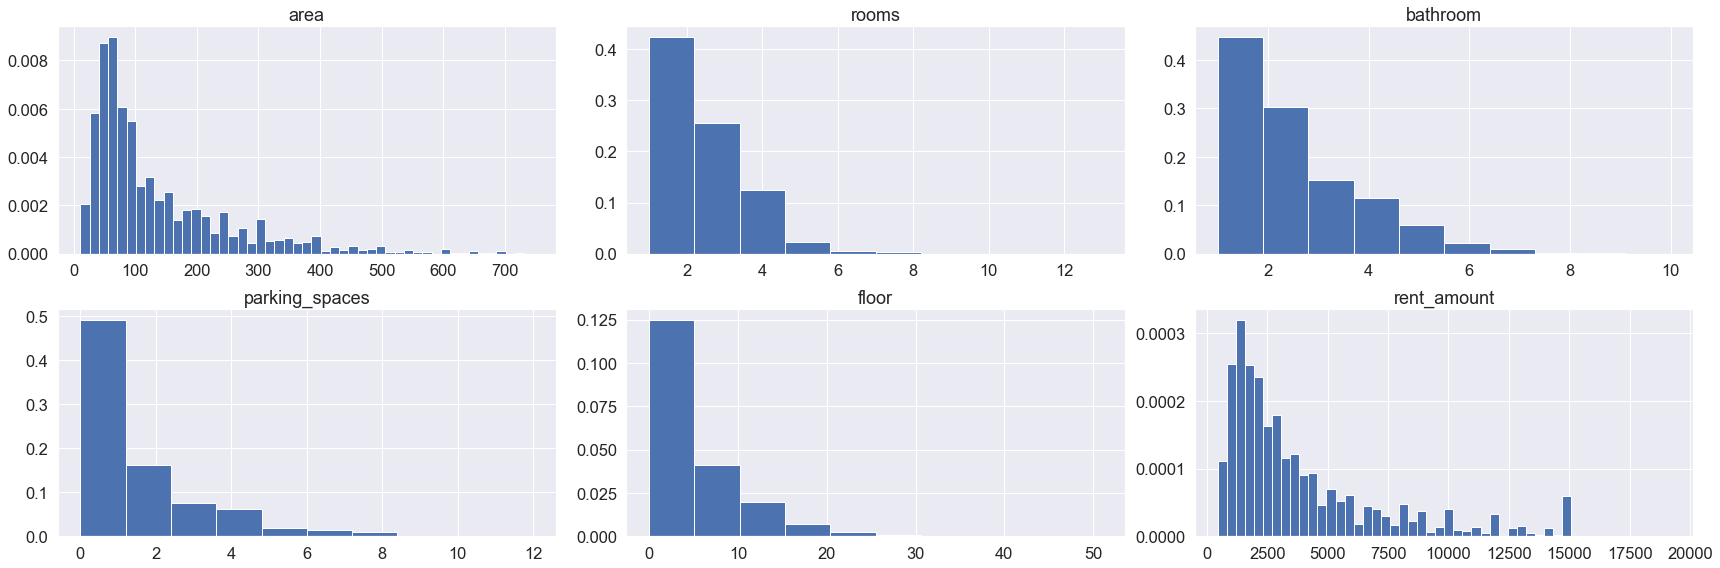

In [238]:
fig = plt.figure(figsize=(24, 8))
i = 1
for data_name in data:
    if data_name not in ['city', 'animal', 'furniture']:
        plt.subplot(230+(i)) 
        bins = None if data_name not in ['area', 'rent_amount'] else np.arange(min(data[data_name]), data[data_name].mean()*5, 15*max([1, (i-1)*5]))
        plt.hist(data[data_name], density=True, bins=bins, edgecolor='white')
        plt.title(data_name)
        i += 1

fig.tight_layout()

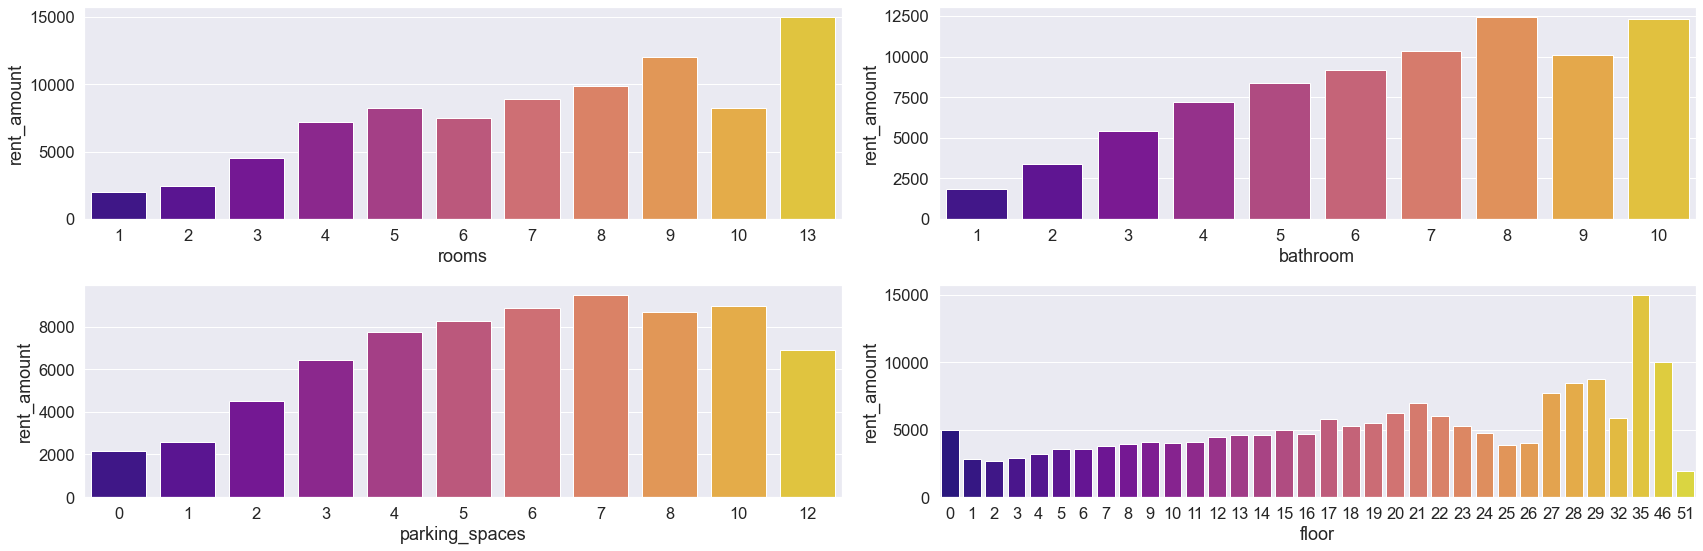

In [239]:
fig = plt.figure(figsize=(24, 8))
sn.set(font_scale=1.5)
i = 1
for data_name in data:
    if data_name not in ['city', 'area', 'animal', 'furniture', 'rent_amount']:
        plt.subplot(220+(i)) 
        price_per_data = data.groupby(data_name)['rent_amount'].mean().reset_index()
        ax = sn.barplot(x=data_name, y='rent_amount', data=price_per_data ,order = price_per_data[data_name], palette = 'plasma')
        i += 1

fig.tight_layout()

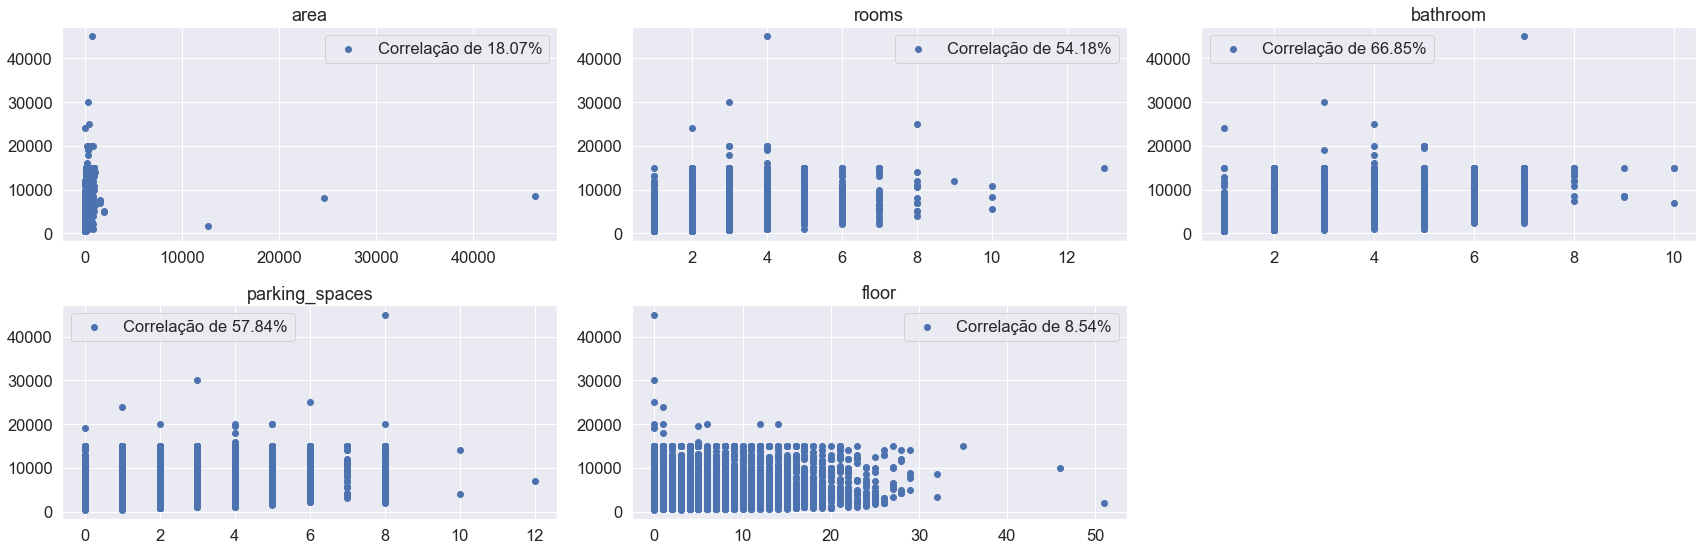

In [240]:
fig = plt.figure(figsize=(24, 8))
i = 1
for data_name in data:
    if data_name not in ['city', 'animal', 'furniture', 'rent_amount']:
        plt.subplot(230+(i)) 
        corr = data[data_name].corr(data['rent_amount'])
        plt.scatter(data[data_name], data['rent_amount'], label=f"Correlação de {corr*100:.2f}%")
        plt.title(data_name)
        plt.legend()
        i += 1

fig.tight_layout()

___
## Classificador automático


___
## Referências